intro: What makes a strong password and why should the IT/infrastructure leaders analyze yearly leaked password datasets
Questions: What is the leaked password trend for 2021? 
    - average, max, min length of leaked string
    - average, max, min time to crack in seconds
    - correlation between length of string and time to crack?
    - were there any passwords that meets strong req leaked (special char, upper, lower, num, len >12)?
    - what is more important, length, or mix of characters
    - Of the passwords on the data set, did it take longer to crack in the previous years or did the time to crack stay the same?
Future: Companies should continue to analyze the password trends yearly to see if password reqs should be updated

**Setting up + basic df info**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.axis import Axis
import math
# from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [4]:
pw = pd.read_csv('top_200_password_2020_by_country.csv')
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds
0,au,Australia,1,123456,308483,< 1 second,1.0,0
1,au,Australia,2,password,191880,< 1 second,5.0,0
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800
3,au,Australia,4,password1,86884,< 1 second,16.0,0
4,au,Australia,5,123456789,75856,< 1 second,2.0,0
...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200


In [5]:
p20 = pd.read_csv('U_password_crack_time_2020.csv')
p20

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.19 MILLISECONDS,2020,0.0
1,1,password,0.19 MILLISECONDS,2020,0.0
2,2,lizottes,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,2020,12253.0
3,3,password1,0.19 MILLISECONDS,2020,0.0
4,4,123456789,0.19 MILLISECONDS,2020,0.0
...,...,...,...,...,...
4250,4250,hongngoc,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,2020,12253.0
4251,4251,anhtien,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,2020,471.0
4252,4252,lanhuong,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,2020,12253.0
4253,4253,congacon,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,2020,12253.0


In [7]:
pw["Time_to_crack_in_seconds"] = p20["Time_to_crack_in_seconds"].values

ValueError: Length of values (4255) does not match length of index (9800)

In [6]:
p20["Time_to_crack_in_seconds"]

0           0.0
1           0.0
2       12253.0
3           0.0
4           0.0
         ...   
4250    12253.0
4251      471.0
4252    12253.0
4253    12253.0
4254    12253.0
Name: Time_to_crack_in_seconds, Length: 4255, dtype: float64

In [3]:
# to find all the countries in the dataset
pw.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Slovak Republic',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vietnam'], dtype=object)

In [4]:
len(pw.country.unique())

49

***Adding Password_Length Column***

In [5]:
#create a new column for password length
pw["Password_Length"] = pw["Password"].apply(len)

In [6]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6
1,au,Australia,2,password,191880,< 1 second,5.0,0,8
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9
...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8


**Creating "Continent" column**

In [7]:
africa = ['Nigeria', 'South Africa']
asia = ['China', 'India', 'Indonesia', 'Israel', 'Japan', 'Korea', 'Malaysia','Philippines', 'Saudi Arabia', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam']
europe = ['Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland','France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
nc_Amer = ['Canada', 'Mexico', 'United States']
ocean_Aus = ['Australia', 'New Zealand'] 
s_Amer = ['Brazil', 'Chile', 'Colombia']

all_cont={"Africa":{'Nigeria', 'South Africa'}, "Asia":{'China', 'India', 'Indonesia', 'Israel', 'Japan', 'Korea', 'Malaysia','Philippines', 'Saudi Arabia', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam'}, "Europe": {'Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland','France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'}, "NC_Amer":{'Canada', 'Mexico', 'United States'}, "Ocean_Aus" : {'Australia', 'New Zealand'}, "S_Amer" : {'Brazil', 'Chile', 'Colombia'}}

In [8]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6
1,au,Australia,2,password,191880,< 1 second,5.0,0,8
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9
...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8


In [9]:
#Create a new column Look at "country" column and find the corresponding continent
def find_Contin(country):
    if country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in nc_Amer:
        return "NC America"
    elif country in ocean_Aus:
        return "Oceania Australia"
    else:
        return "other"

pw["Continent"] = pw["country"].apply(lambda x: find_Contin(x))

In [10]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia


# -------- Comparing by countries --------

# How many users in each country were found to have used passwords on the list

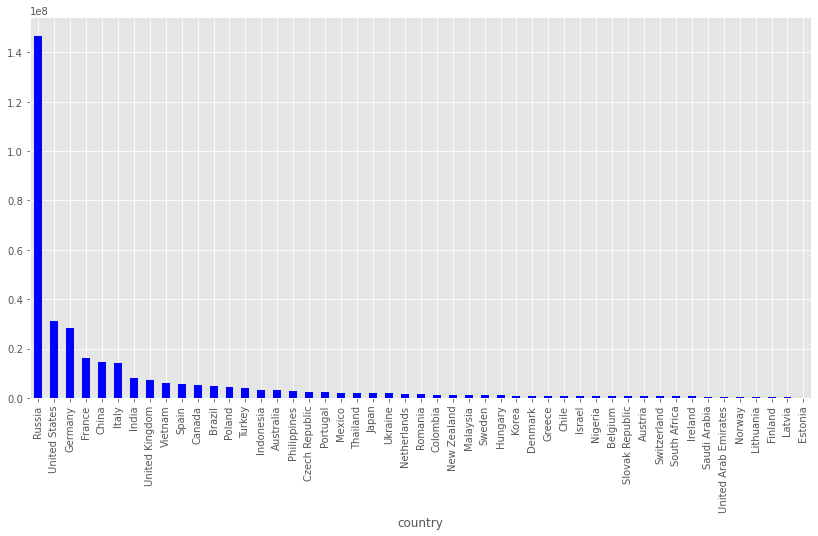

In [11]:
plt.figure(figsize = (14,7))
sum_Usr_cnt_ctry = pw.groupby("country")["User_count"].sum().sort_values(ascending=False).plot.bar(color = 'b')
sum_Usr_cnt_ctry.ylabel = ("User Count")

In [12]:
sum_Usr_cnt_ctry = pw.groupby("country")["User_count"].sum()
sum_Usr_cnt_ctry 

country
Australia                 3083341
Austria                    695307
Belgium                    729661
Brazil                    4943358
Canada                    5277926
Chile                      846354
China                    14739683
Colombia                  1379631
Czech Republic            2288530
Denmark                    862571
Estonia                    169656
Finland                    268236
France                   16160255
Germany                  28364318
Greece                     861187
Hungary                   1159682
India                     8186249
Indonesia                 3223828
Ireland                    590381
Israel                     793908
Italy                    14030845
Japan                     1906700
Korea                      910432
Latvia                     181072
Lithuania                  406310
Malaysia                  1359725
Mexico                    2162221
Netherlands               1636625
New Zealand               1367054
Nigeri

# Is there a relationship between the passworth length and the time to crack in seconds?

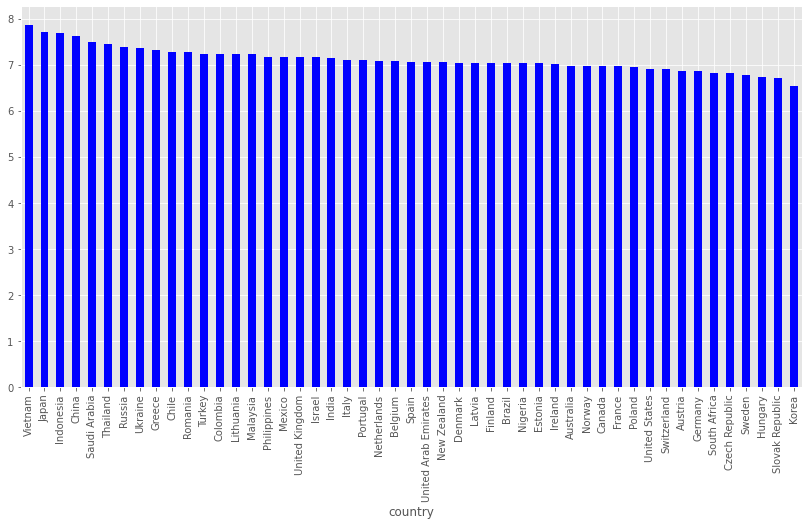

In [13]:
#WITHOUT LOG: Plot by mean password length of each country
plt.figure(figsize = (14,7))
mean_pwd_len_ctry = pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False).plot.bar(color = 'b')
mean_pwd_len_ctry.ylabel = ("Password Length")

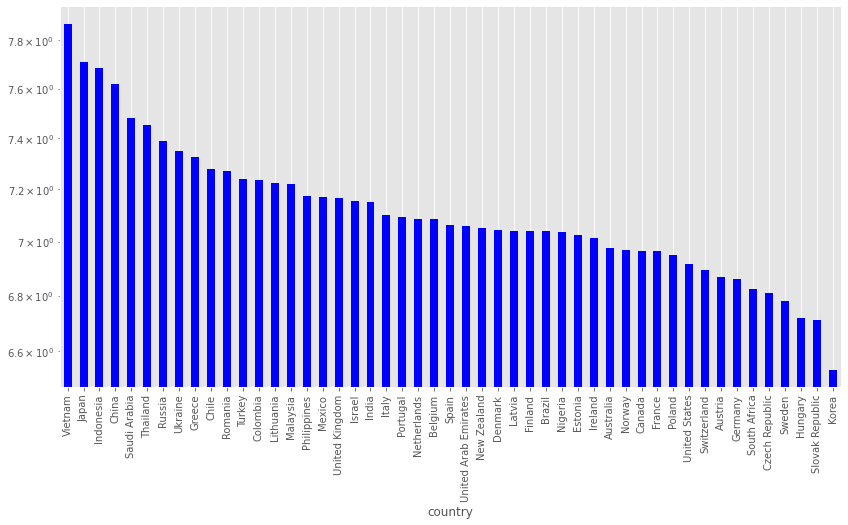

In [14]:
# Plot by mean password length of each country
plt.figure(figsize = (14,7))
mean_pwd_len_ctry = pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False).plot.bar(color = 'b')
mean_pwd_len_ctry.ylabel = ("Password Length")
plt.yscale("log")

In [15]:
# mean password length of all countries
pw["Password_Length"].mean()

7.116224489795918

In [16]:
#mean password length of just US
pw[pw["country_code"] == "us"]["Password_Length"].mean()

6.915

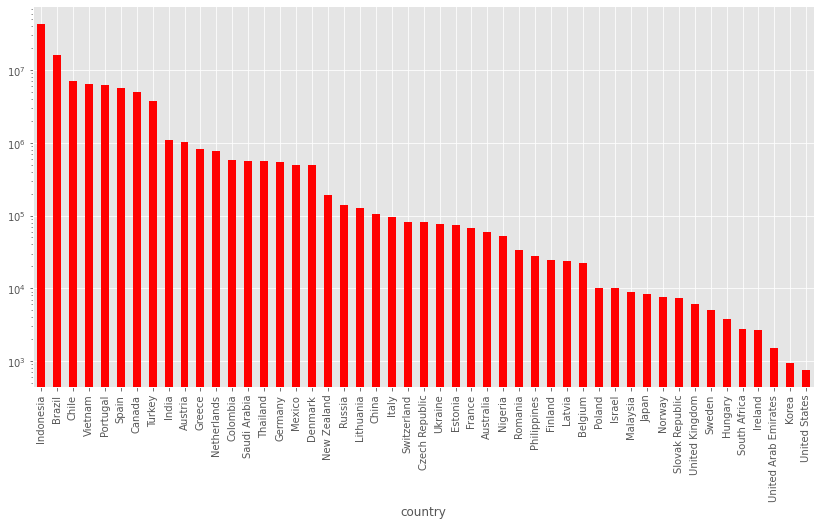

In [17]:
# mean time to crack by country
plt.figure(figsize = (14,7))
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False).plot.bar(color = 'r')

plt.yscale("log")

<AxesSubplot:xlabel='country'>

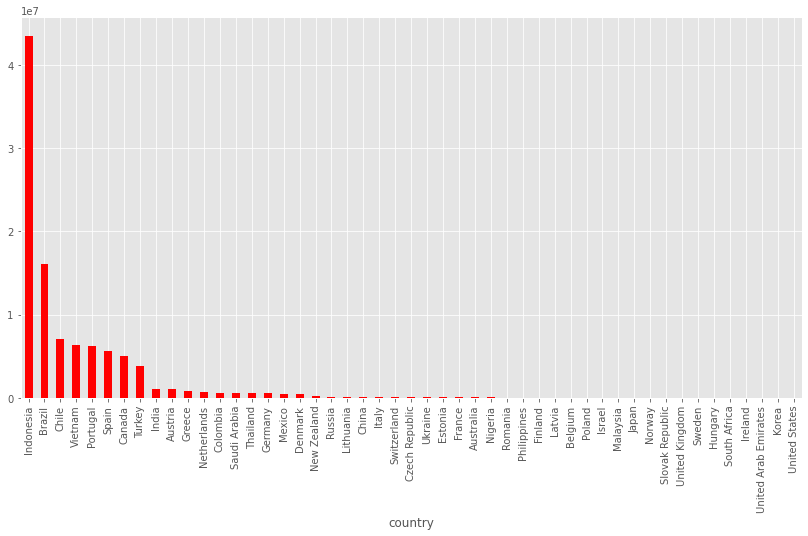

In [18]:
#WITHOUT LOG: mean time to crack by country
plt.figure(figsize = (14,7))
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False).plot.bar(color = 'r')

In [19]:
#mean time to crack in seconds of all countries
pw["Time_to_crack_in_seconds"].mean()

2082684.368265306

In [20]:
pw.groupby("country")["Time_to_crack_in_seconds"].mean()

country
Australia               5.976797e+04
Austria                 1.026148e+06
Belgium                 2.239815e+04
Brazil                  1.613735e+07
Canada                  4.998296e+06
Chile                   7.088719e+06
China                   1.050397e+05
Colombia                5.717405e+05
Czech Republic          8.119792e+04
Denmark                 4.897201e+05
Estonia                 7.296645e+04
Finland                 2.444704e+04
France                  6.742391e+04
Germany                 5.426753e+05
Greece                  8.114022e+05
Hungary                 3.819540e+03
India                   1.105793e+06
Indonesia               4.351774e+07
Ireland                 2.662440e+03
Israel                  1.012401e+04
Italy                   9.420367e+04
Japan                   8.406075e+03
Korea                   9.498750e+02
Latvia                  2.364351e+04
Lithuania               1.256489e+05
Malaysia                8.881785e+03
Mexico                  4.9779

# Do different countries share same top used passwords (Top 3)

In [21]:
top3passXcountry = pw.groupby(["country", "Rank"])["Password"].head()
top3passXcountry

0          123456
1        password
2        lizottes
3       password1
4       123456789
          ...    
9795     hongngoc
9796      anhtien
9797     lanhuong
9798     congacon
9799     conmemay
Name: Password, Length: 9800, dtype: object

In [22]:
top3passXcountry = pw["country", "Rank"])["Password"].head()
top3passXcountry

SyntaxError: unmatched ')' (Temp/ipykernel_12116/2685927214.py, line 1)

Since there are some of the same passwords on list, analyze by unique passwords

# -------- Analysis of unique passwords --------

**Finding unique passwords from list**

In [23]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia


In [28]:
pw.drop_duplicates(subset= ["Password"], keep = 'first', inplace = True)
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia


In [29]:
len(pw["Password"])

4255

In [71]:
df21_mean_TTIS = pw["Time_to_crack_in_seconds"].mean()

In [30]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia


In [31]:
uniq = pd.read_csv("Unique_Pwd_List.csv")
uniq

,index,Unique Passwords
0,0,123456
1,1,password
2,2,lizottes
3,3,password1
4,4,123456789
...,...,...
4250,4250,hongngoc
4251,4251,anhtien
4252,4252,lanhuong
4253,4253,congacon


# Dissecting unique passwords by character type

**Create bool columns based on if they meet password criteria. Only focusing on unique passwords**

In [32]:
special_char = "!@#$%^&*()-+?_=,<>/"
numbers = "1234567890"
upper = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lower = "abcdefghijklmnopqrstuvwxyz"


def hasUpper(x):
    for i in range(len(x)):
        if x[i] in upper:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasLower(x):
    for i in range(len(x)):
        if x[i] in lower:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasNum(x):
    for i in range(len(x)):
        if x[i] in numbers:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasSpec(x):
    for i in range(len(x)):
        if x[i] in special_char:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def Len_Over_12(Password_Length):
    if Password_Length > 12:
        return True
        if i != len(Password_Length):
            i+=1
    else:
        return False



pw["Has_Upper"] = pw["Password"].apply(lambda x: hasUpper(x))
pw["Has_Lower"] = pw["Password"].apply(lambda x: hasLower(x))
pw["Has_Num"] = pw["Password"].apply(lambda x: hasNum(x))
pw["Has_Special_Char"] = pw["Password"].apply(lambda x: hasSpec(x))
pw["Has_len_Over12"] = pw["Password_Length"].apply(lambda x: Len_Over_12(x))

In [33]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia,False,False,True,False,False
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia,False,True,False,False,False
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia,False,True,False,False,False
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia,False,True,True,False,False
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia,False,True,False,False,False
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia,False,True,False,False,False
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia,False,True,False,False,False
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia,False,True,False,False,False


**Adding Password complexity column that counts True by row**

In [34]:
pw["Password_Complexity"] = pw.Has_Upper.astype(int) + pw.Has_Lower + pw.Has_Num + pw.Has_Special_Char + pw.Has_len_Over12

In [35]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia,False,False,True,False,False,1
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia,False,True,False,False,False,1
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia,False,True,False,False,False,1
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia,False,True,True,False,False,2
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia,False,True,False,False,False,1
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia,False,True,False,False,False,1


Find the number of passwords based on password type

In [36]:
#Only all upper case passwords
onlyUpPwd = pw.loc[(pw.Has_Upper == True) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
len_onlyUpPwd = len(onlyUpPwd)
onlyUpPwd
len_onlyUpPwd

3

In [37]:
onlyUpPwd.describe()

,Rank,User_count,Global_rank,Time_to_crack_in_seconds,Password_Length,Password_Complexity
count,3.000000,3.000000,0.0,3.000000e+00,3.000000,3.0
mean,132.000000,42656.000000,NaN,3.459800e+05,7.666667,1.0
std,77.207513,71729.645942,NaN,5.982678e+05,2.081666,0.0
min,43.000000,1063.000000,NaN,1.200000e+02,6.000000,1.0
25%,107.500000,1243.000000,NaN,5.700000e+02,6.500000,1.0
50%,172.000000,1423.000000,NaN,1.020000e+03,7.000000,1.0
75%,176.500000,63452.500000,NaN,5.189100e+05,8.500000,1.0
max,181.000000,125482.000000,NaN,1.036800e+06,10.000000,1.0


In [38]:
#Only all lower case passwords
onlyLowPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == True) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
len_onlyLowPwd= len(onlyLowPwd)
onlyLowPwd
len_onlyLowPwd

3360

In [39]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia,False,False,True,False,False,1
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia,False,True,False,False,False,1
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia,False,True,False,False,False,1
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia,False,True,True,False,False,2
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia,False,True,False,False,False,1
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia,False,True,False,False,False,1


In [40]:
# finding passwords that meet all strong reqs : 0 found
strongest_pwd = pw.loc[(pw.Has_Upper == True) & (pw.Has_Lower == True) & (pw.Has_Num ==True) & (pw.Has_Special_Char ==True) & (pw.Has_len_Over12 == True)]
strongest_pwd

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity


In [41]:
# since there isn't a password that means all 5 requirements, finding them meeting 4
pw[pw["Password_Complexity"] == 4]

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
966,ca,Canada,167,N0=Acc3ss,10876,1 Minute,NaN,60,9,NC America,True,True,True,True,False,4
3214,in,India,15,1qaz@WSX,57391,11 Minutes,NaN,660,8,Asia,True,True,True,True,False,4
3260,in,India,61,wowecarts@123,20062,3 Years,NaN,96422400,13,Asia,False,True,True,True,True,4
3271,in,India,72,P@ssw0rd,18301,< 1 second,NaN,0,8,Asia,True,True,True,True,False,4


In [42]:
pwd_Complex4 = round((pw[pw["Password_Complexity"] == 4]["Time_to_crack_in_seconds"].mean()), 0)
pwd_Complex4

24105780.0

In [44]:
pw[pw["Password_Complexity"] == 4]["Password_Length"]

966      9
3214     8
3260    13
3271     8
Name: Password_Length, dtype: int64

In [45]:
pwd_Complex1 = round((pw[pw["Password_Complexity"] == 1]["Time_to_crack_in_seconds"].mean()), 0)               
pwd_Complex1

383986.0

In [47]:
pw[pw["Password_Complexity"] == 1]["Password_Length"]

0       6
1       8
2       8
4       9
5       5
       ..
9795    8
9796    7
9797    8
9798    8
9799    8
Name: Password_Length, Length: 3585, dtype: int64

Text(0, 0.5, 'Mean Time to crack in seconds')

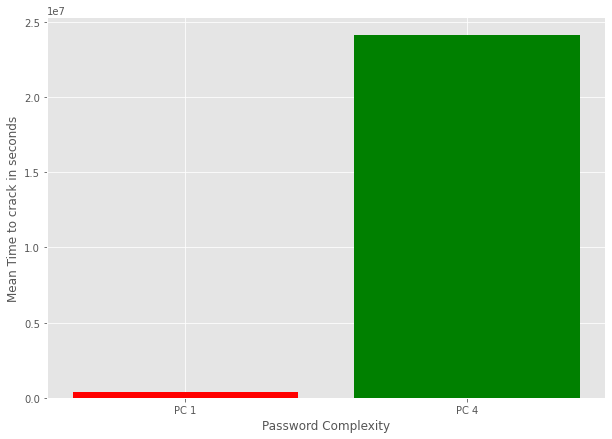

In [49]:
x = ["PC 1", "PC 4"]
y = [pwd_Complex1, pwd_Complex4]
plt.figure(figsize=(10, 7))
plt.bar(x, y, color=['red', 'green'])

plt.xlabel('Password Complexity')
plt.ylabel('Mean Time to crack in seconds')

**Taking the log of password crack by seconds column**

In [50]:
pw["Log_of_TTCIS"] = np.log(pw["Time_to_crack_in_seconds"]+1)

In [51]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity,Log_of_TTCIS
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia,False,False,True,False,False,1,0.000000
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia,False,True,False,False,False,1,0.000000
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia,False,True,False,False,False,1,9.287394
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia,False,True,True,False,False,2,0.000000
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia,False,False,True,False,False,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1,9.287394
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia,False,True,False,False,False,1,6.928538
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1,9.287394
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia,False,True,False,False,False,1,8.881975


**Comparing the elements that make a strong password using boxplot**

<AxesSubplot:>

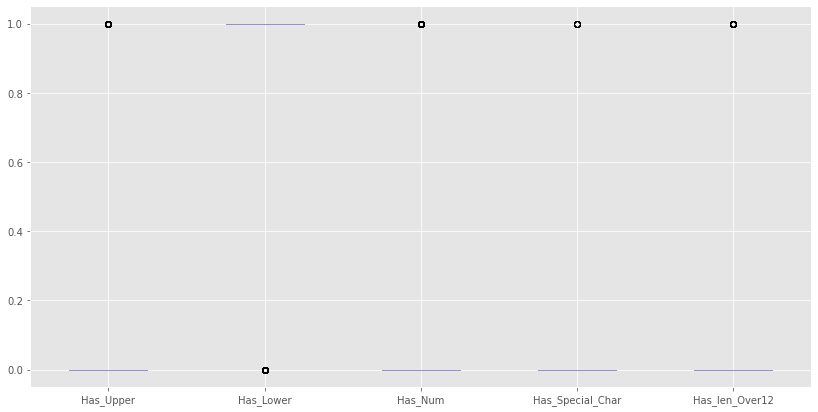

In [52]:
plt.figure(figsize = (14,7))
pw.boxplot(column=['Has_Upper', 'Has_Lower', 'Has_Num', "Has_Special_Char", "Has_len_Over12"]) 

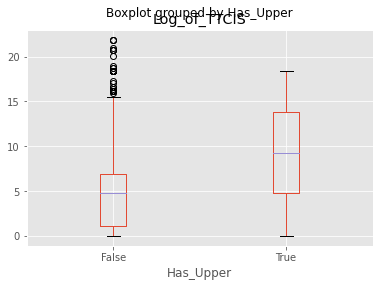

In [53]:
bp_Up = pw.boxplot(['Log_of_TTCIS'], by="Has_Upper")

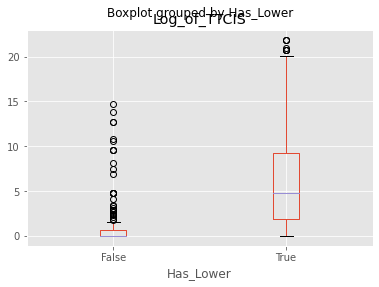

In [54]:
bp_Low = pw.boxplot(['Log_of_TTCIS'], by="Has_Lower")

<AxesSubplot:title={'center':'Log_of_TTCIS'}, xlabel='Has_Num'>

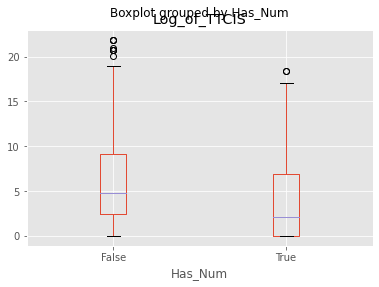

In [55]:
pw.boxplot(['Log_of_TTCIS'], by='Has_Num')

<AxesSubplot:title={'center':'Log_of_TTCIS'}, xlabel='Has_Special_Char'>

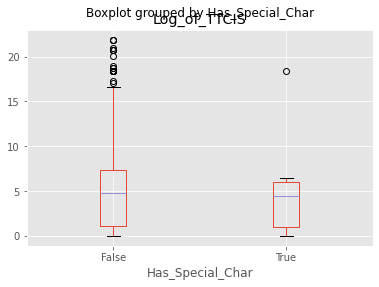

In [56]:
pw.boxplot(['Log_of_TTCIS'], by="Has_Special_Char")

<AxesSubplot:title={'center':'Log_of_TTCIS'}, xlabel='Has_len_Over12'>

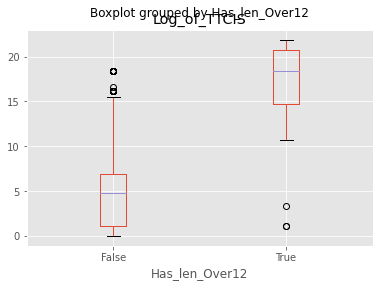

In [57]:
pw.boxplot(['Log_of_TTCIS'], by="Has_len_Over12")

In [58]:
pw["Has_Upper"].describe()

count      4255
unique        2
top       False
freq       4185
Name: Has_Upper, dtype: object

# plt.barh(pwd_Complex4, pwd_Complex4)
plt.ylabel("Password Complexity")
plt.show()

In [61]:
pw

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity,Log_of_TTCIS
0,au,Australia,1,123456,308483,< 1 second,1.0,0,6,Oceania Australia,False,False,True,False,False,1,0.000000
1,au,Australia,2,password,191880,< 1 second,5.0,0,8,Oceania Australia,False,True,False,False,False,1,0.000000
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,8,Oceania Australia,False,True,False,False,False,1,9.287394
3,au,Australia,4,password1,86884,< 1 second,16.0,0,9,Oceania Australia,False,True,True,False,False,2,0.000000
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,9,Oceania Australia,False,False,True,False,False,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1,9.287394
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,7,Asia,False,True,False,False,False,1,6.928538
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,8,Asia,False,True,False,False,False,1,9.287394
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,8,Asia,False,True,False,False,False,1,8.881975


In [60]:
#paswords that are soley numbers
onlyNumPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==True) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
len_onlyNumPwd = len(onlyNumPwd)
onlyNumPwd
len_onlyNumPwd

222

In [62]:
#passwords that are soley special chacters
onlySpePwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==True) & (pw.Has_len_Over12 == False)]
len_onlySpePwd= len(onlySpePwd)
onlySpePwd
len_onlySpePwd

0

In [63]:
#Other language password
otherPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
len_otherPwd = len(otherPwd)
len_otherPwd

2

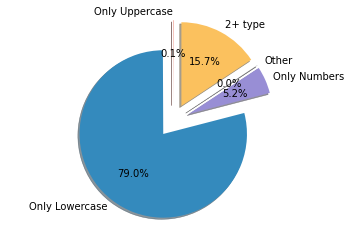

In [64]:
# Pie chart of unique passwords by character type
two_type = len(pw) - (len_onlyUpPwd+ len_onlyLowPwd+ len_onlyNumPwd+ len_onlySpePwd + len_otherPwd)

pie_chart_arr = np.array([len_onlyUpPwd, len_onlyLowPwd, len_onlyNumPwd, len_otherPwd, two_type])
#pie_chart_arr = np.array([5, 6872, 1295, 2, 2921])
pie_chart_label = ["Only Uppercase", "Only Lowercase", "Only Numbers", "Other", "2+ type"]
explode = (0.2, 0.2, 0.2, 0.2, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(pie_chart_arr, explode=explode, labels = pie_chart_label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [65]:
onlyLowPwd["Time_to_crack_in_seconds"].describe()

count    3.360000e+03
mean     4.091431e+05
std      5.338057e+06
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+02
75%      7.200000e+03
max      9.642240e+07
Name: Time_to_crack_in_seconds, dtype: float64

In [66]:
(~pw["Has_Upper"]).values.sum()

4185

In [67]:
pw["Has_Upper"].values.sum()

70

In [68]:
pw["Has_Lower"].values.sum()

4025

# Of the unique passwords in the list, has the crack time changed from the past years? [do passwords get easier to crack over time?]

In [72]:
# mean TTIS for year 2021
df21_mean_TTIS

4145399.796944771

In [106]:
df20_mean_TTIS = p20["Time_to_crack_in_seconds"].mean()
df20_mean_TTIS

11495940698502.844

In [107]:
p19 = pd.read_csv('U_password_crack_time_2019.csv')
p19

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.20 MILLISECONDS,2019,0.0
1,1,password,0.20 MILLISECONDS,2019,0.0
2,2,lizottes,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0
3,3,password1,0.20 MILLISECONDS,2019,0.0
4,4,123456789,0.20 MILLISECONDS,2019,0.0
...,...,...,...,...,...
4250,4250,hongngoc,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0
4251,4251,anhtien,8 MINUTES 21 SECONDS 85 JIFFIES 7 MILLISECONDS,2019,501.0
4252,4252,lanhuong,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0
4253,4253,congacon,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0


In [108]:
df19_mean_TTIS = p19["Time_to_crack_in_seconds"].mean()
df19_mean_TTIS

12217198473964.408

In [109]:
p18 = pd.read_csv('U_password_crack_time_2018.csv')
p18

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.22 MILLISECONDS,2018,0.0
1,1,password,0.22 MILLISECONDS,2018,0.0
2,2,lizottes,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0
3,3,password1,0.22 MILLISECONDS,2018,0.0
4,4,123456789,0.22 MILLISECONDS,2018,0.0
...,...,...,...,...,...
4250,4250,hongngoc,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0
4251,4251,anhtien,8 MINUTES 54 SECONDS 64 JIFFIES 5 MILLISECONDS,2018,534.0
4252,4252,lanhuong,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0
4253,4253,congacon,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0


In [110]:
df18_mean_TTIS = p18["Time_to_crack_in_seconds"].mean()
df18_mean_TTIS

13017196257847.102

In [111]:
p17 = pd.read_csv('U_password_crack_time_2017.csv')
p17

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.23 MILLISECONDS,2017,0.0
1,1,password,0.23 MILLISECONDS,2017,0.0
2,2,lizottes,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0
3,3,password1,0.23 MILLISECONDS,2017,0.0
4,4,123456789,0.23 MILLISECONDS,2017,0.0
...,...,...,...,...,...
4250,4250,hongngoc,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0
4251,4251,anhtien,9 MINUTES 30 SECONDS 17 JIFFIES 3 MILLISECONDS,2017,570.0
4252,4252,lanhuong,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0
4253,4253,congacon,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0


In [112]:
df17_mean_TTIS = p17["Time_to_crack_in_seconds"].mean()
df17_mean_TTIS

13908280833311.486

In [113]:
p16 = pd.read_csv('U_password_crack_time_2016.csv')
p16

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.25 MILLISECONDS,2016,0.0
1,1,password,0.25 MILLISECONDS,2016,0.0
2,2,lizottes,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0
3,3,password1,0.25 MILLISECONDS,2016,0.0
4,4,123456789,0.25 MILLISECONDS,2016,0.0
...,...,...,...,...,...
4250,4250,hongngoc,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0
4251,4251,anhtien,10 MINUTES 11 SECONDS 3 JIFFIES 2 MILLISECONDS,2016,611.0
4252,4252,lanhuong,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0
4253,4253,congacon,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0


In [114]:
df16_mean_TTIS = p16["Time_to_crack_in_seconds"].mean()
df16_mean_TTIS

14905106747783.549

In [115]:
p15 = pd.read_csv('U_password_crack_time_2015.csv')
p15

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.29 MILLISECONDS,2015,0.0
1,1,password,0.29 MILLISECONDS,2015,0.0
2,2,lizottes,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0
3,3,password1,0.29 MILLISECONDS,2015,0.0
4,4,123456789,0.29 MILLISECONDS,2015,0.0
...,...,...,...,...,...
4250,4250,hongngoc,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0
4251,4251,anhtien,11 MINUTES 48 SECONDS 98 JIFFIES 4 MILLISECONDS,2015,708.0
4252,4252,lanhuong,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0
4253,4253,congacon,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0


In [116]:
df15_mean_TTIS = p15["Time_to_crack_in_seconds"].mean()
df15_mean_TTIS

17270097662984.64

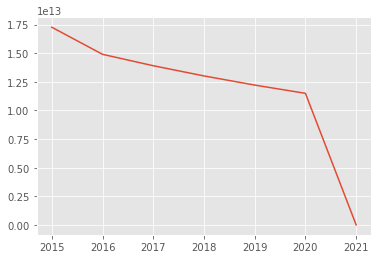

In [117]:
x = [2015,2016,2017,2018,2019,2020,2021]
y =[df15_mean_TTIS, df16_mean_TTIS, df17_mean_TTIS, df18_mean_TTIS, df19_mean_TTIS, df20_mean_TTIS, df21_mean_TTIS]
plt.plot(x,y)

# Are there same passwords from last year's list in this year's?

# Is there a change in average length of password by years?

**Only US info**

In [ ]:
# table of just US rows
US_df = pw.loc[pw["country"] == "United States"]
US_df.to_csv("US_df.csv")

In [ ]:
us = pd.read_csv("US_df.csv")
us

In [ ]:
us

# conclusion

It would have been really nice to have been able to analyze the data and see if there is a correlation between length of the string and the time takes to crack 